In [1]:
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
from sisepuede.manager.sisepuede_file_structure import SISEPUEDEFileStructure
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._plotting as spu
import sisepuede.utilities._toolbox as sf

file_struct = SISEPUEDEFileStructure()

matt = file_struct.model_attributes

In [2]:
# Define the current directory and output data path
dir_cur = pathlib.Path(os.getcwd()).parent
output_data = dir_cur.joinpath("ssp_run_output")

In [3]:
# Change this line only when you receive a new run
run_folder = "sisepuede_summary_results_run_sisepuede_run_2025-08-19T15;26;17.115357"
file_name  = "WIDE_INPUTS_OUTPUTS.csv"
file_name

'WIDE_INPUTS_OUTPUTS.csv'

In [4]:
# Define the run folder and tableau data path
run = output_data.joinpath(run_folder)
tableau = dir_cur.joinpath("Tableau/data")
os.makedirs(tableau, exist_ok=True)

In [5]:
# Define the region
region = "uganda"

In [6]:
# Load the output data
ssp_output = pd.read_csv(run.joinpath(file_name))
ssp_output.head()

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha,yf_lndu_supremum_pastures_tonne_per_ha
0,0,uganda,0,747901.028486,2.386299e+06,183833.867477,1.333131e+06,595.329750,605228.344795,3.433943e+06,...,2.123306,0.762027,0.982737,0.3674,0.784492,2.755775,76.794300,4.446020,4.002223,92.81
1,0,uganda,1,748561.556254,2.388407e+06,183996.225021,1.334309e+06,595.855531,605762.867563,3.436975e+06,...,2.171183,0.716171,0.984473,0.3674,0.803826,2.826323,77.459654,4.558346,4.070985,92.81
2,0,uganda,2,750431.308342,2.394373e+06,184455.809571,1.337642e+06,597.343855,607275.938034,3.445560e+06,...,2.136681,0.771066,0.999795,0.3674,0.808390,2.908776,77.263223,5.202683,4.007029,92.81
3,0,uganda,3,754614.187122,2.407719e+06,185483.960027,1.345098e+06,600.673429,610660.873612,3.464766e+06,...,2.134035,0.744831,1.441325,0.3674,0.804774,2.961356,76.784930,5.605283,4.014348,92.81
4,0,uganda,4,759734.779356,2.424057e+06,186742.600192,1.354225e+06,604.749424,614804.640560,3.488277e+06,...,2.172065,0.458120,1.528325,0.3674,0.799814,2.970174,77.726965,4.805888,4.035314,92.81


In [7]:
# Load atribute primary data
df_primary =pd.read_csv(run.joinpath("ATTRIBUTE_PRIMARY.csv"))
df_primary.head()

,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,70070,0,6004,0
2,73073,0,6007,0


In [8]:
# Load atribute strategy data
df_strategy =pd.read_csv(run.joinpath("ATTRIBUTE_STRATEGY.csv"))
df_strategy.tail()

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
69,6003,PFLO:NDC,NDC,NDC,TX:AGRC:DEC_CH4_RICE_STRATEGY_NDC|TX:AGRC:INC_...,0
70,6004,PFLO:NZ,NZ,Net Zero,TX:SCOE:DEC_DEMAND_HEAT_STRATEGY_NZ|TX:AGRC:DE...,0
71,6005,PFLO:BAU,BAU,S BAU,TX:LVST:INC_PRODUCTIVITY_STRATEGY_BAU|TX:AGRC:...,0
72,6006,PFLO:ASP,ASP,S ASP,TX:LVST:INC_PRODUCTIVITY_STRATEGY_ASP|TX:AGRC:...,0
73,6007,PFLO:NDC_2_2020_START,NDC 2.0 (2020 Start),NDC with start date of 2020; reflects original...,TX:AGRC:DEC_CH4_RICE_STRATEGY_NDC2020|TX:AGRC:...,0


In [9]:
# Merge the dataframes to include primary and strategy information in the ssp_output
ssp_output = ssp_output.merge(  df_primary, how='left', on='primary_id')
ssp_output = ssp_output.merge(  df_strategy, how='left', on='strategy_id')

In [10]:
# Strategys in the output
ssp_output.value_counts('strategy')

strategy
NDC 2.0 (2020  Start)    56
NZ                       56
Strategy TX:BASE         56
Name: count, dtype: int64

In [64]:
def plot_field_stack(
    df,
    fields,
    dict_format,
    time_col="time_period",
    primary_id=0,
    figsize=(10, 5),
    legend_loc='center left',
    legend_bbox=(1.05, 0.5),  
    ylabel="MT Emissions CO2e",
    xlabel="Time Period",
    title=None,
):
    """
    Plots a stack plot of the selected fields for a given primary_id.

    Args:
        df (pd.DataFrame): DataFrame containing output data.
        fields (list): List of column names to plot.
        dict_format (dict): Formatting dictionary for colors.
        time_col (str): Name of the time column.
        primary_id (int): Value of primary_id to filter.
        figsize (tuple): Figure size.
        legend_loc (str): Legend location.
        legend_bbox (tuple): Legend bbox_to_anchor.
        ylabel (str): Y-axis label.
        xlabel (str): X-axis label.
        title (str): Plot title.
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)

    df_plot = df[df["primary_id"] == primary_id]

    fig, ax = spu.plot_stack(
        df_plot,
        fields,
        dict_formatting=dict_format,
        field_x=time_col,
        figtuple=(fig, ax),
    )

    ax.legend(loc=legend_loc, bbox_to_anchor=legend_bbox, title="Fields")
    plt.show()

In [65]:
run_primary_ids = ssp_output.primary_id.unique()
run_primary_ids

array([    0, 70070, 73073])

In [ ]:
# Define the fields to plot and the formatting dictionary
subsector_emission_fields = matt.get_all_subsector_emission_total_fields()

dict_format = dict(
    (k, {"color": v}) for (k, v) in
    matt.get_subsector_color_map().items()
)


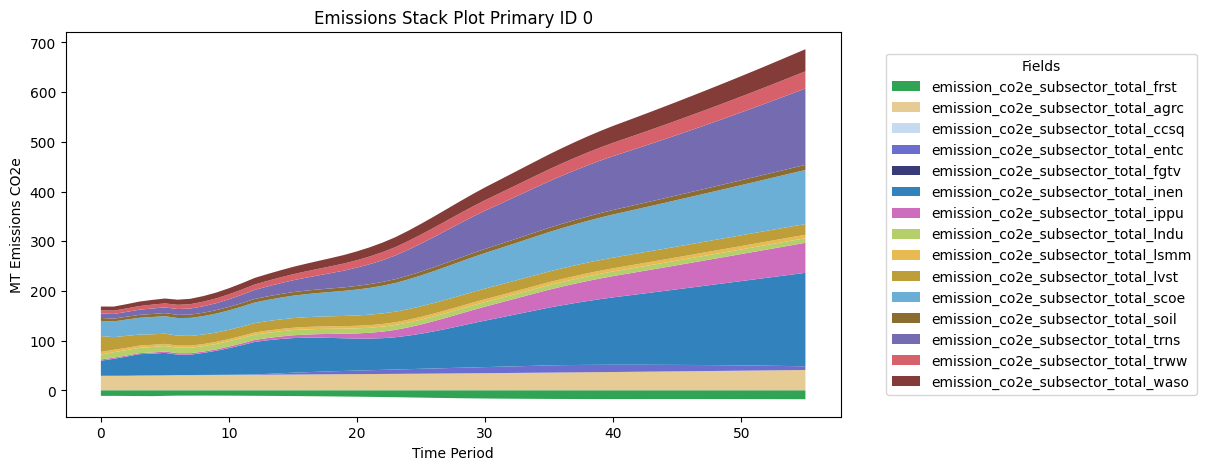

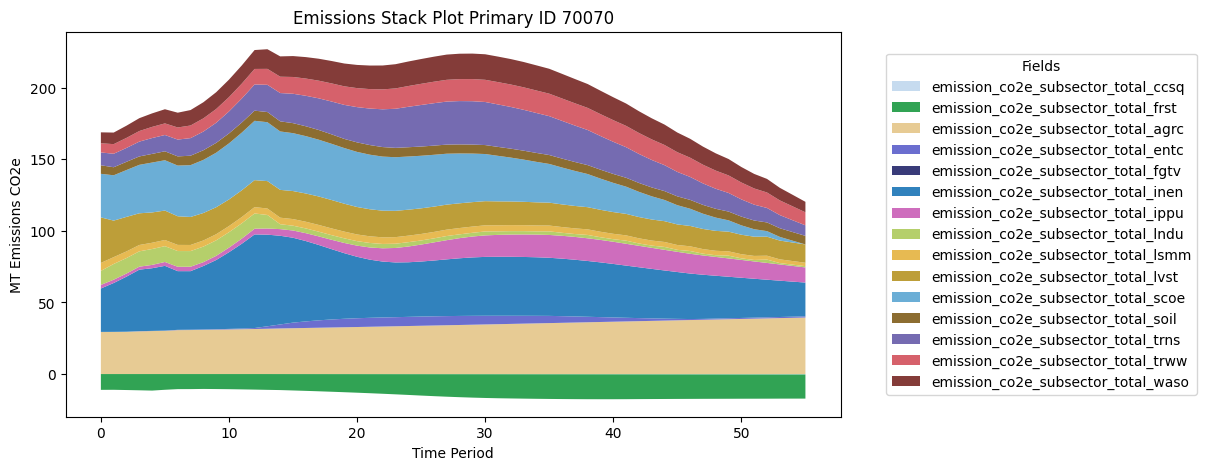

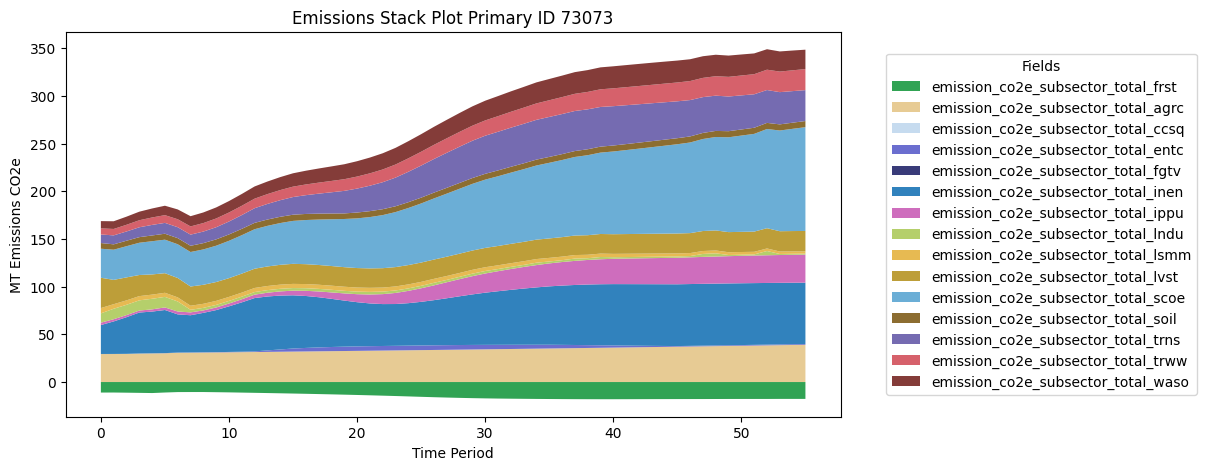

In [72]:
# Plot the emissions stack for the primary_id 0 (which is the baseline)

for single_id in run_primary_ids:

    plot_field_stack(
        ssp_output,
        subsector_emission_fields,
        dict_format,
        primary_id=int(single_id),
        title=f"Emissions Stack Plot Primary ID {int(single_id)}"
    )

In [90]:
# --- Define fields  ---
fields_str = (
  
   "emission_co2e_n2o_waso_compost_food:"
   "emission_co2e_n2o_waso_compost_sludge:"
   "emission_co2e_n2o_waso_compost_yard:"
   "emission_co2e_n2o_waso_incineration"
)
fields = fields_str.split(":")
fields

['emission_co2e_n2o_waso_compost_food',
 'emission_co2e_n2o_waso_compost_sludge',
 'emission_co2e_n2o_waso_compost_yard',
 'emission_co2e_n2o_waso_incineration']

In [91]:
import matplotlib

# Generate a color palette with as many colors as fields
colors = matplotlib.colormaps['tab20'].colors  # or use 'tab20', 'hsv', etc.
color_list = [colors[i % len(colors)] for i in range(len(fields))]

dict_format = dict(
    (field, {"color": matplotlib.colors.to_hex(color_list[i])})
    for i, field in enumerate(fields)
)

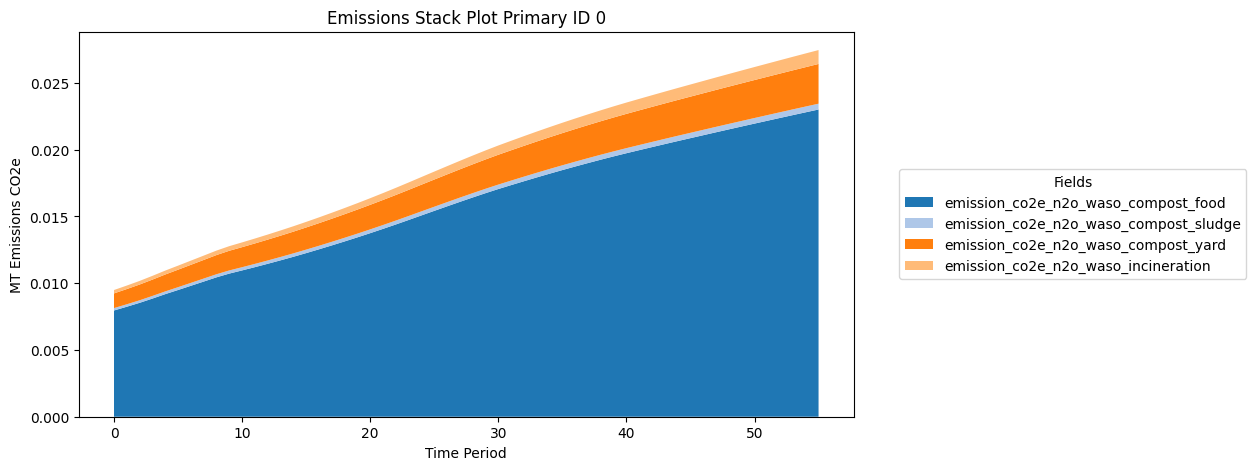

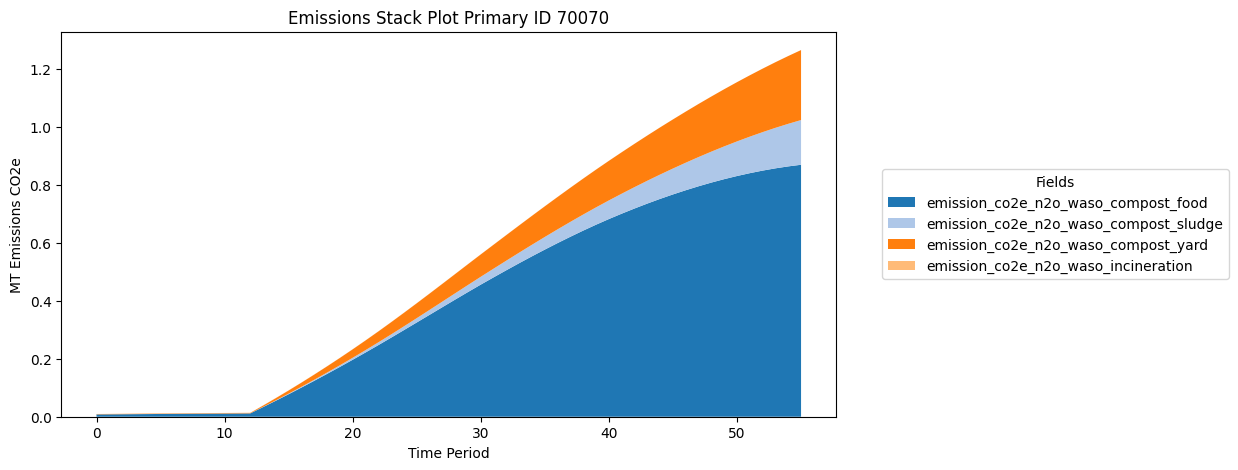

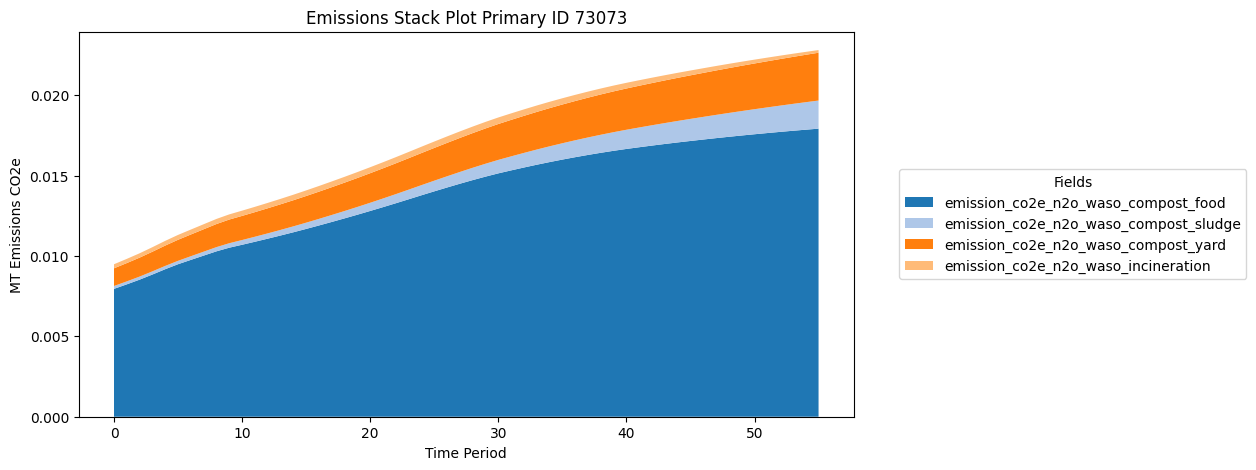

In [92]:
# Plot the emissions stack for the primary_id 0 (which is the baseline)

for single_id in run_primary_ids:

    plot_field_stack(
        ssp_output,
        fields,
        dict_format,
        primary_id=int(single_id),
        title=f"Emissions Stack Plot Primary ID {int(single_id)}"
    )

In [88]:
# --- Define fields  ---
fields_str = (
  "emission_co2e_co2_lndu_conversion_forests_mangroves_to_croplands:"
   "emission_co2e_co2_lndu_conversion_forests_mangroves_to_forests_mangroves:"
   "emission_co2e_co2_lndu_conversion_forests_mangroves_to_forests_primary:"
   "emission_co2e_co2_lndu_conversion_forests_mangroves_to_forests_secondary:"
   "emission_co2e_co2_lndu_conversion_forests_mangroves_to_grasslands:"
   "emission_co2e_co2_lndu_conversion_forests_mangroves_to_other:"
   "emission_co2e_co2_lndu_conversion_forests_mangroves_to_settlements:"
   "emission_co2e_co2_lndu_conversion_forests_mangroves_to_wetlands:"
   "emission_co2e_co2_lndu_conversion_forests_primary_to_croplands:"
   "emission_co2e_co2_lndu_conversion_forests_primary_to_forests_mangroves:"
   "emission_co2e_co2_lndu_conversion_forests_primary_to_forests_primary:"
   "emission_co2e_co2_lndu_conversion_forests_primary_to_forests_secondary:"
   "emission_co2e_co2_lndu_conversion_forests_primary_to_grasslands:"
   "emission_co2e_co2_lndu_conversion_forests_primary_to_other:"
   "emission_co2e_co2_lndu_conversion_forests_primary_to_settlements:"
   "emission_co2e_co2_lndu_conversion_forests_primary_to_wetlands:"
   "emission_co2e_co2_lndu_conversion_forests_secondary_to_croplands:"
   "emission_co2e_co2_lndu_conversion_forests_secondary_to_forests_mangroves:"
   "emission_co2e_co2_lndu_conversion_forests_secondary_to_forests_primary:"
   "emission_co2e_co2_lndu_conversion_forests_secondary_to_forests_secondary:"
   "emission_co2e_co2_lndu_conversion_forests_secondary_to_grasslands:"
   "emission_co2e_co2_lndu_conversion_forests_secondary_to_other:"
   "emission_co2e_co2_lndu_conversion_forests_secondary_to_settlements:"
   "emission_co2e_co2_lndu_conversion_forests_secondary_to_wetlands:"
   "emission_co2e_ch4_lndu_wetlands"
)
fields = fields_str.split(":")
fields


# Generate a color palette with as many colors as fields
colors = matplotlib.colormaps['tab20'].colors  # or use 'tab20', 'hsv', etc.
color_list = [colors[i % len(colors)] for i in range(len(fields))]

dict_format = dict(
    (field, {"color": matplotlib.colors.to_hex(color_list[i])})
    for i, field in enumerate(fields)
)

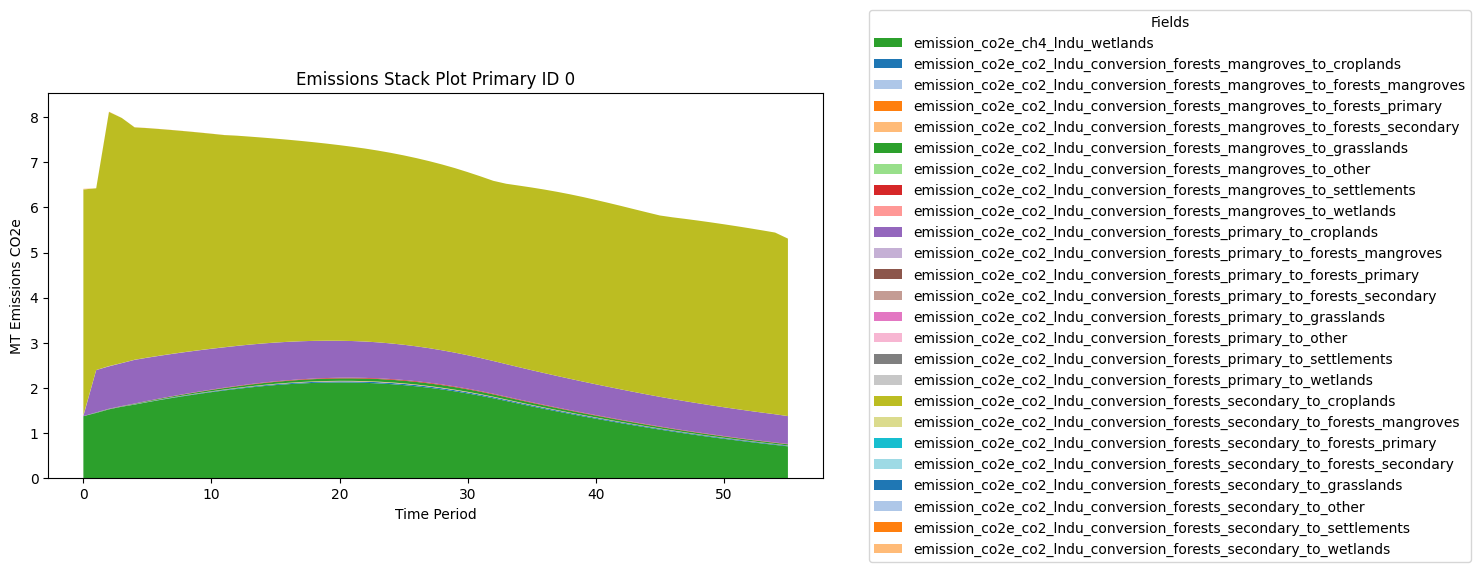

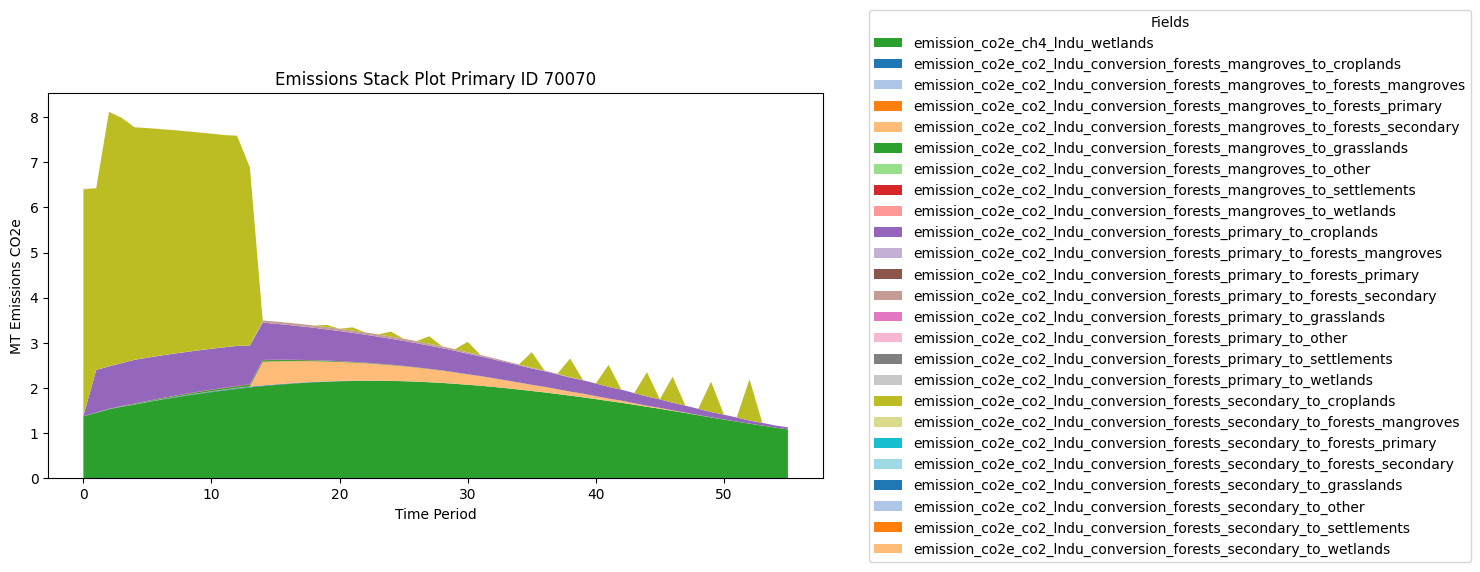

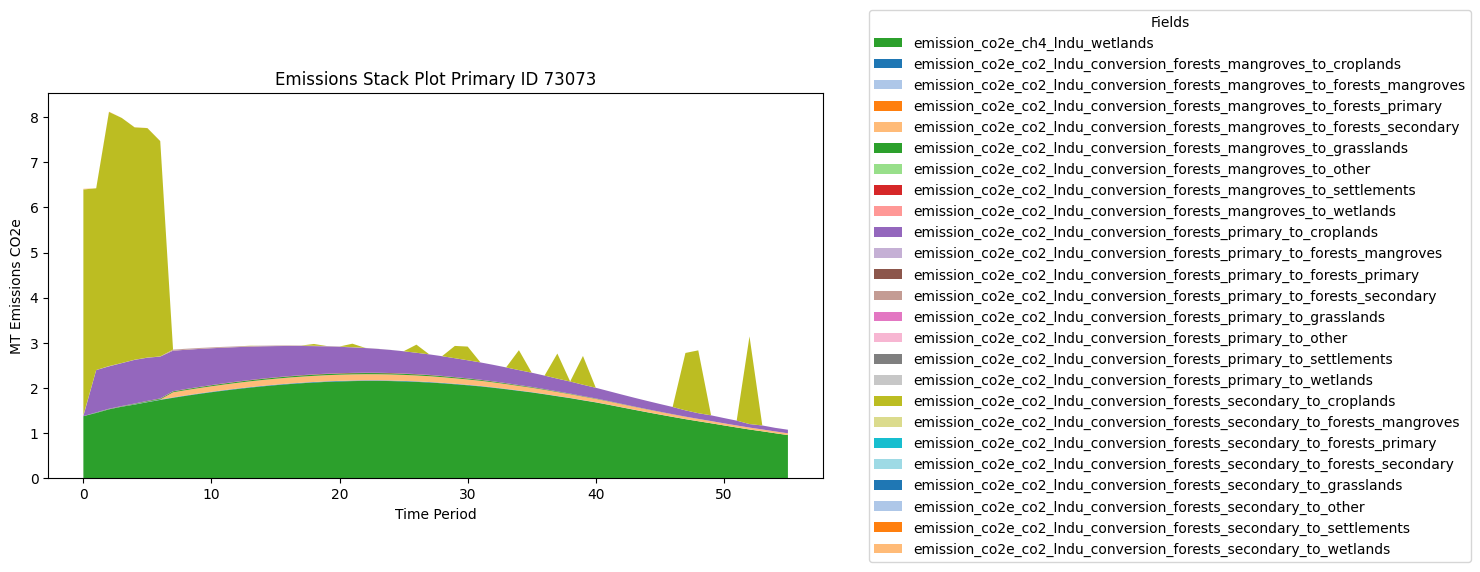

In [89]:
# Plot the emissions stack for the primary_id 0 (which is the baseline)

for single_id in run_primary_ids:

    plot_field_stack(
        ssp_output,
        fields,
        dict_format,
        primary_id=int(single_id),
        title=f"Emissions Stack Plot Primary ID {int(single_id)}"
    )

In [ ]:
# Get the list of all fields in the output
subsector_emission_fields = matt.get_all_subsector_emission_total_fields()
subsector_emission_fields

In [ ]:
# Define subsector emission fields that are not energy related
subsector_emission_fields_non_energy = [f for f in subsector_emission_fields if f not in ['emission_co2e_subsector_total_inen', 'emission_co2e_subsector_total_fgtv', 'emission_co2e_subsector_total_entc']]
subsector_emission_fields_non_energy

In [ ]:
# Define year based on time_period
ssp_output['year'] = ssp_output['time_period'] + 2015

In [ ]:
# Melt ssp_output to long format for variables in subsector_emission_fields
ssp_long = ssp_output.melt(
    id_vars=['primary_id', 'strategy', 'strategy_id', 'year'],
    value_vars=subsector_emission_fields,
    var_name='Subsector',
    value_name='Emission'
)
ssp_long.head()

In [ ]:
# Clean the 'Subsector' column to remove the prefix and capitalize subsector names
ssp_long['Subsector'] = ssp_long['Subsector'].str.replace('emission_co2e_subsector_total_', '', regex=False)
ssp_long['Subsector'] = ssp_long['Subsector'].str.capitalize()
ssp_long.head()

In [ ]:
# List of subsectors in the output
ssp_long.value_counts('Subsector')

In [ ]:
# Define a dictionary to map subsector codes to full names
subsector_dict = {
    "Agrc": "Agriculture",
    "Frst": "Forest",
    "Lndu": "Land Use",
    "Lsmm": "Livestock Manure Management",
    "Lvst": "Livestock",
    "Soil": "Soil Management",
    "Wail": "Liquid Waste",
    "Waso": "Solid Waste",
    "Trww": "Wastewater Treatment",
    "Ccsq": "Carbon Capture and Sequestration",
    "Enfu": "Energy Fuels",
    "Enst": "Energy Storage",
    "Entc": "Energy Technology",
    "Fgtv": "Fugitive Emissions",
    "Inen": "Industrial Energy",
    "Scoe": "Stationary Combustion and Other Energy",
    "Trns": "Transportation",
    "Trde": "Transportation Demand",
    "Ippu": "IPPU",
    "Econ": "Economy",
    "Gnrl": "General"
}

ssp_long['Subsector'] = ssp_long['Subsector'].replace(subsector_dict)
ssp_long.value_counts('Subsector')

In [ ]:
# Rename columns
ssp_long = ssp_long.rename(columns={"primary_id": "Primary Id",
                                    "strategy": "Strategy",
                                    "strategy_id": "Strategy Id",
                                    "year": "Year"})
ssp_long

In [ ]:
# Save the long format data to a CSV file for Tableau
ssp_long.to_csv(tableau.joinpath(f"emissions_{region}_{file_name}.csv"), index=False)